<a href="https://www.kaggle.com/code/himanshikawade04/heart-disease-prediction?scriptVersionId=185592286" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import warnings

## Load the data

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Ignore warnings
warnings.filterwarnings('ignore')

## Know about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(1025, 14)

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

## Train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X=df.drop(columns='target',axis=1)
y=df['target']

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [15]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

In [16]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [17]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [18]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (820, 13) and size 10660
X_test shape (205, 13) and size 2665
y_train shape (820,) and size 820
y_test shape (205,) and size 205


## Model Building

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
X_train_prediction= lr.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [22]:
print('accuracy of our training data',training_data_accuracy)

accuracy of our training data 0.8658536585365854


In [23]:
X_test_prediction= lr.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)

In [24]:
print('accuracy of our test data',test_data_accuracy)

accuracy of our test data 0.7853658536585366


## Visualization

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


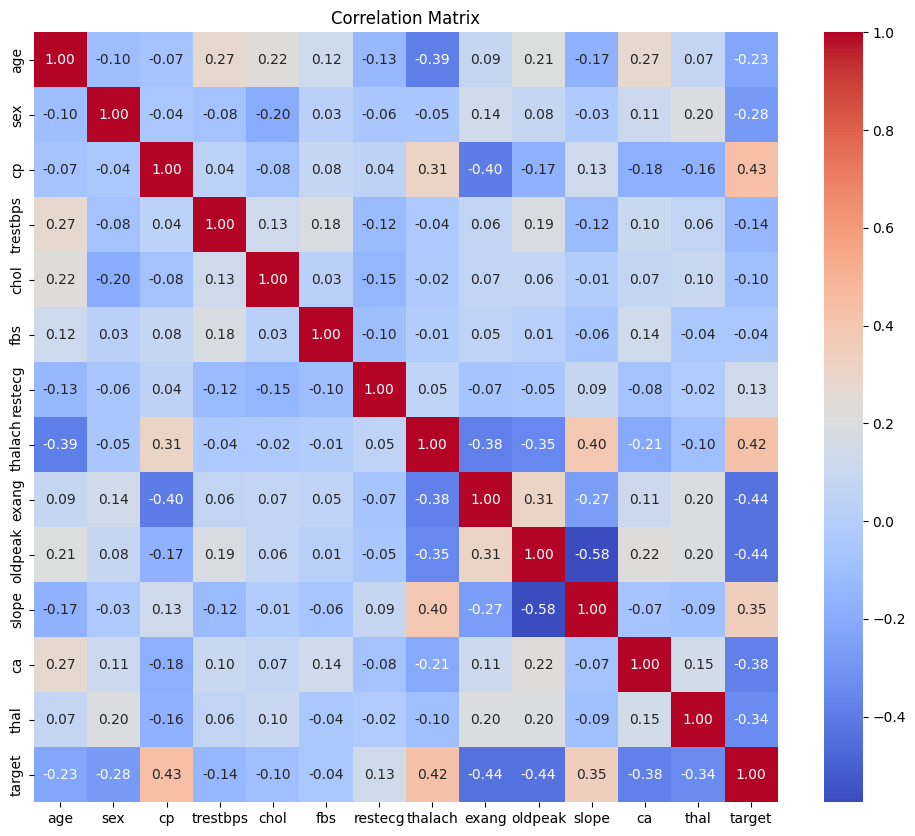

In [27]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

## Making Predictive System

In [28]:
# Prediction with a person with heart disease data
data_input = np.array([41,0,1,105,198,0,1,168,0,0,2,1,2]).reshape(1,-1)
# Prediction with a person without heart disease data
data_input = np.array([61,1,0,148,203,0,1,161,0,0,2,1,3]).reshape(1,-1)

# making prediction
prediction = lr.predict(data_input)
print(prediction)

if(prediction[0] == 0):
  print('The Person does not have a heart disease')
else:
  print('The Person has a heart disease')

[0]
The Person does not have a heart disease
